In [1]:
import sys
!{sys.executable} -m pip install scipy

# SCDM Updates 07/07/20 by Peace Kotamnives

## QE inputs :
### Energy cutoff plane-wave = 85 Ry 
### Pseudo potentials (norm-conserving) = O_HSCV_PBE-1.0.UPF and H_HSCV_PBE-1.0.UPF


### Water2
#### cell size = 20.000 Ang  
#### FFT dimensions = 225x225x225  
#### PW = 714383
#### Dense grid = 5715789 G-vectors 


### Water64
#### cell size = 12.417 Ang
#### FFT dimensions = 144x144x144 
#### PW = 170901
#### Dense grid = 1367449 G-vectors 

<IPython.core.display.Javascript object>


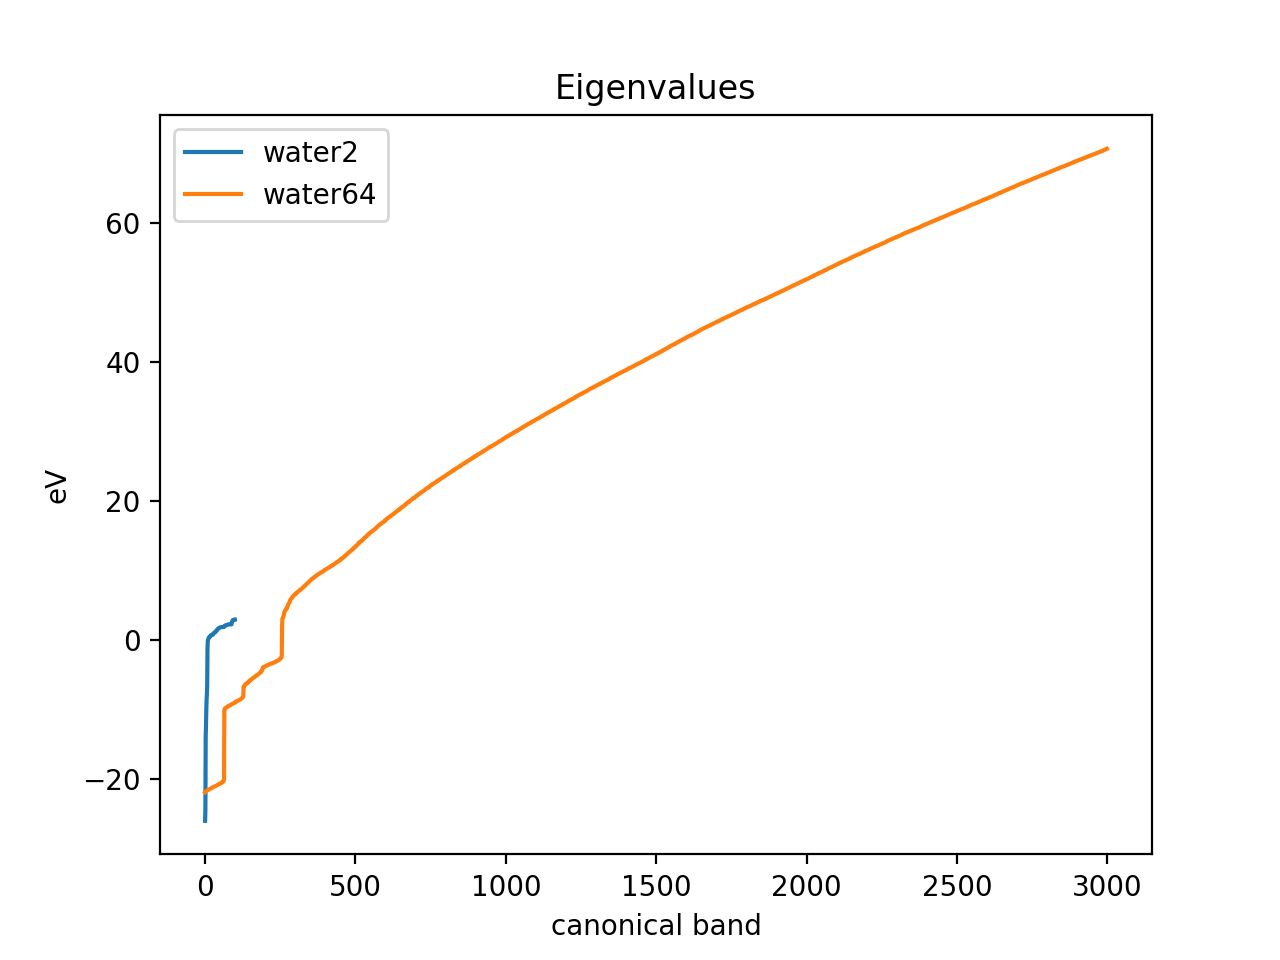

Text(0, 0.5, 'eV')

In [2]:
import numpy as np
from scipy import linalg 
import glob, os
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
mpld3.enable_notebook()


eig_water2 =  open('water2.eig','r')
lines = eig_water2.readlines()
D_water2 = []
for line in lines:
    orbt_info = np.asarray(line.split()[0:3],dtype='float')
    D_water2.append(orbt_info[-1])
eig_water2.close()

eig_water64 =  open('water64.eig','r')

lines = eig_water64.readlines()
D_water64 = []
for line in lines:
    orbt_info = np.asarray(line.split()[0:3],dtype='float')
    D_water64.append(orbt_info[-1])
eig_water64.close()

plt.figure(1)
plt.rcParams["figure.figsize"] = [7,4]
plt.plot(D_water2,label='water2')
plt.plot(D_water64,label='water64')
plt.legend()
plt.title('Eigenvalues')
plt.xlabel('canonical band')
plt.ylabel('eV')

#### norm calculation: $\sum_{j}{\Psi_{i}(j)^{*}\Psi_{i}}(j)\frac{\Omega}{ngrid}=1$  from the Rieman sum of grid points in a cubic cell

#### Note: the canonical orbitals and SCDM orbitals in this analysis are rounded the normalization to 1 as it is opposed to have the sum less 1. 

<IPython.core.display.Javascript object>


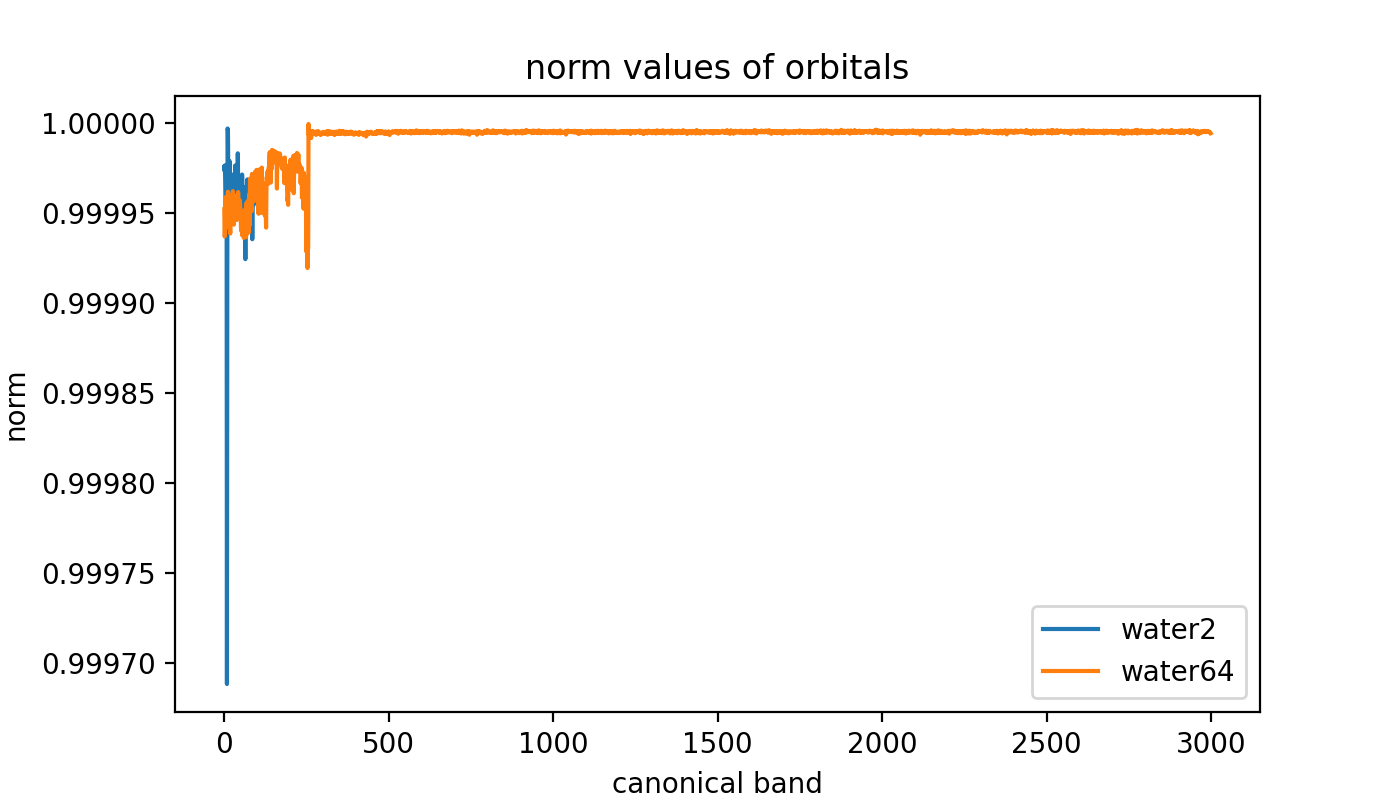

Text(0, 0.5, 'norm')

In [3]:
norms_water2 =  np.load('obtl_norm_water2_nbd100.npy')
norms_water64 =  np.load('obtl_norm_water64_nbd3000.npy')

plt.figure(3)
plt.plot(abs(norms_water2),label='water2')
plt.plot(abs(norms_water64),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('norm values of orbitals')
plt.xlabel('canonical band')
plt.ylabel('norm')

highest valence eigenvalue in water2 is-6.50908972744
highest valence eigenvalue in water64 is-2.327903364484


<IPython.core.display.Javascript object>


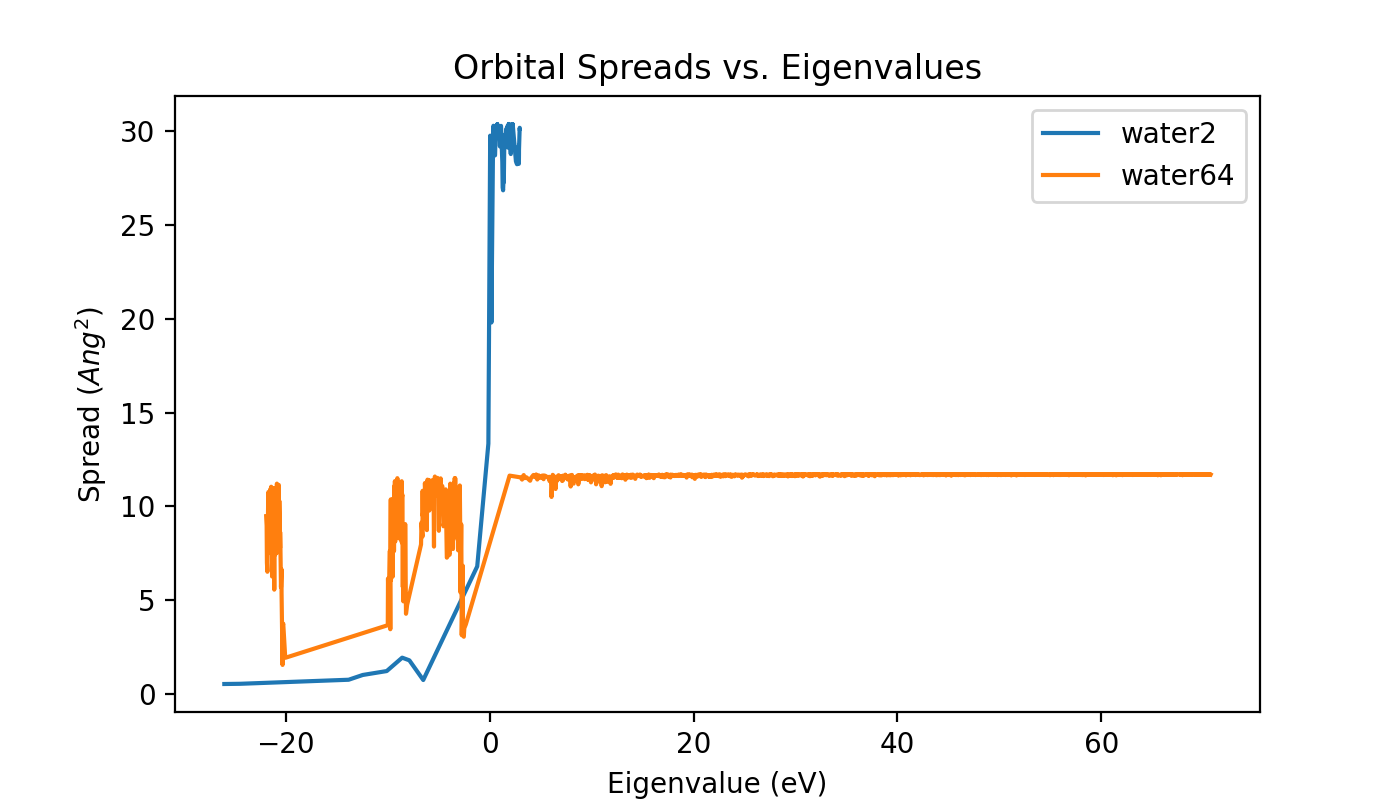

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [4]:
Omegas2_psi = np.load('unsorted_obtl_spread_psi_dim_100_water2.npy')
Omegas64_psi = np.load('unsorted_obtl_spread_psi_dim_3000_water64.npy')

print('highest valence eigenvalue in water2 is'+ str(D_water2[7]))
print('highest valence eigenvalue in water64 is'+ str(D_water64[255]))
plt.figure(5)
plt.plot(D_water2,Omegas2_psi,label='water2')
plt.plot(D_water64,Omegas64_psi,label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Orbital Spreads vs. Eigenvalues')
plt.xlabel('Eigenvalue (eV)')
plt.ylabel('Spread ($Ang^{2}$)')

<IPython.core.display.Javascript object>


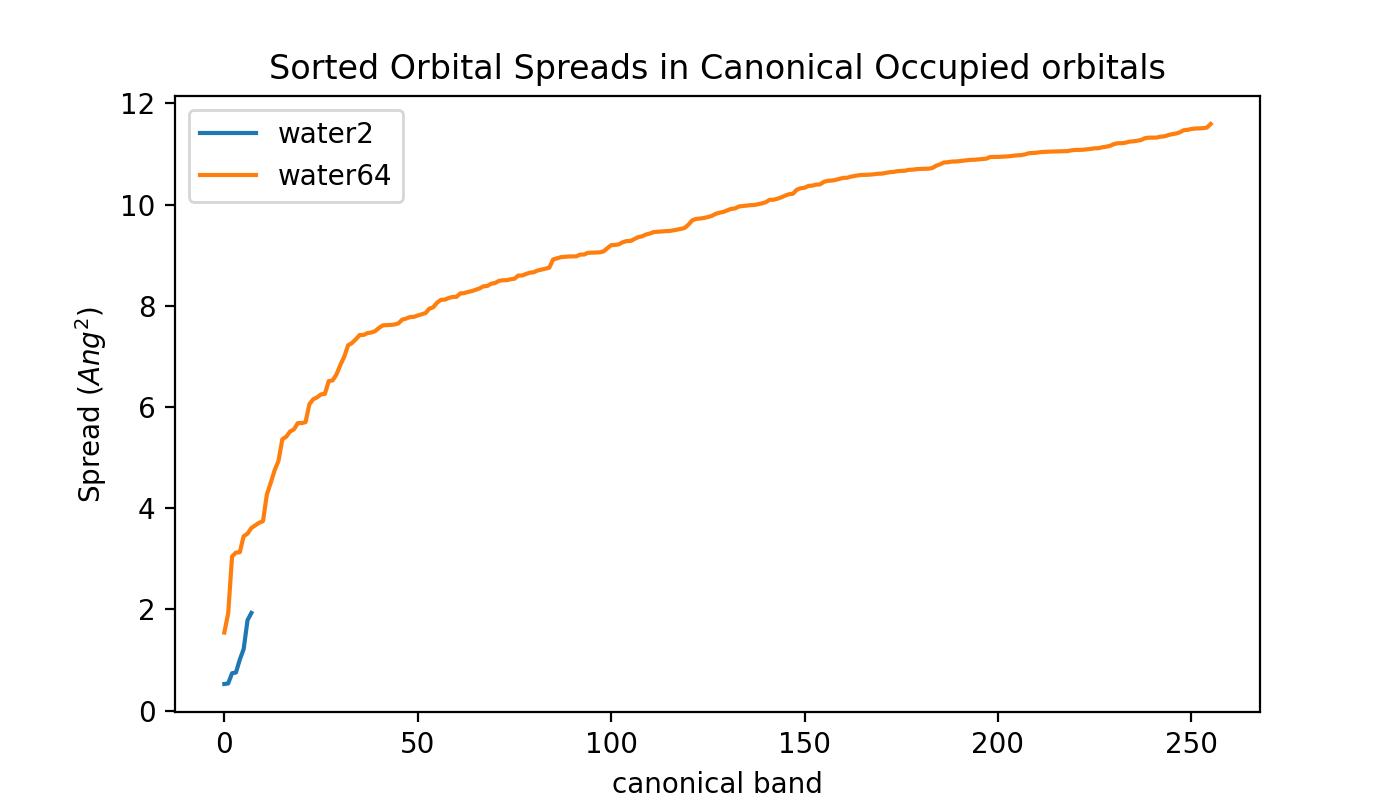

<IPython.core.display.Javascript object>


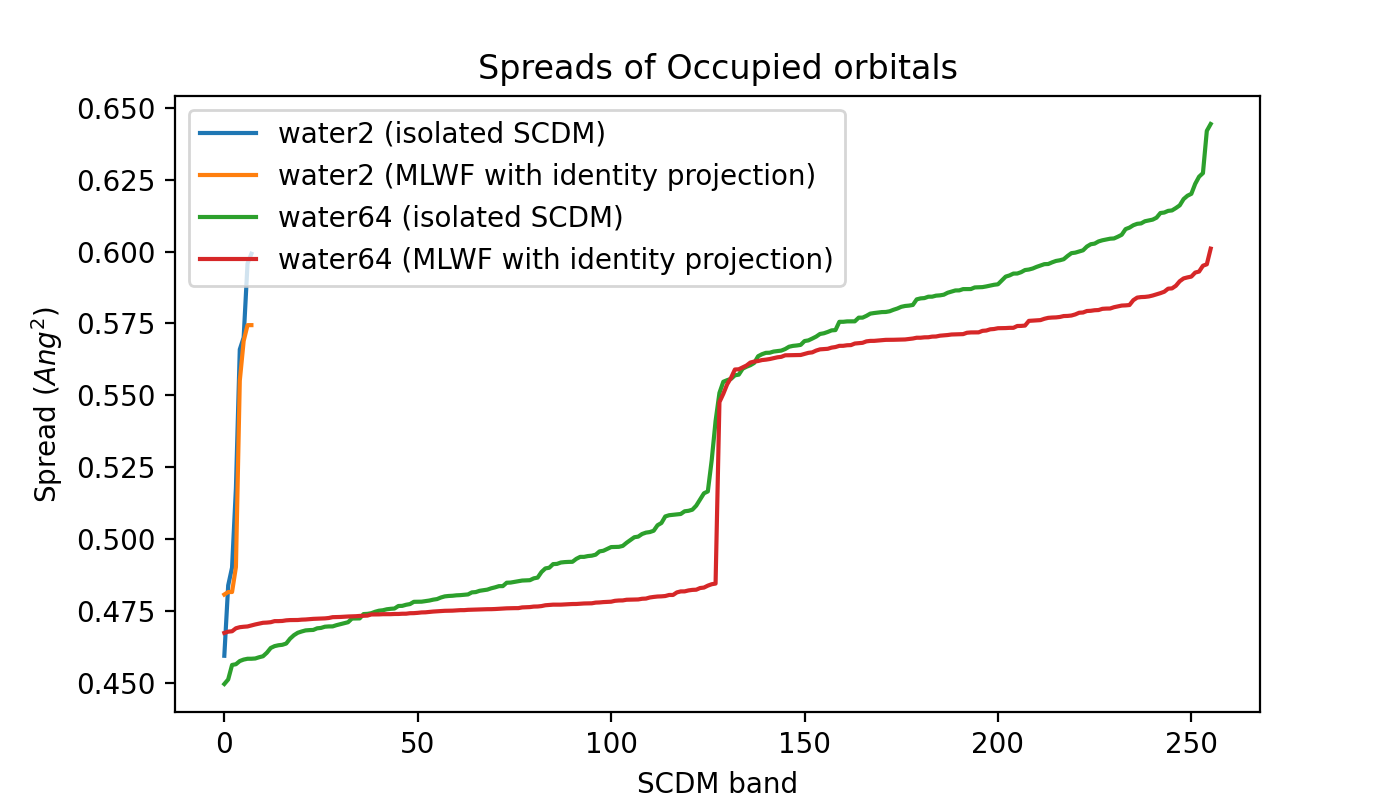

<IPython.core.display.Javascript object>


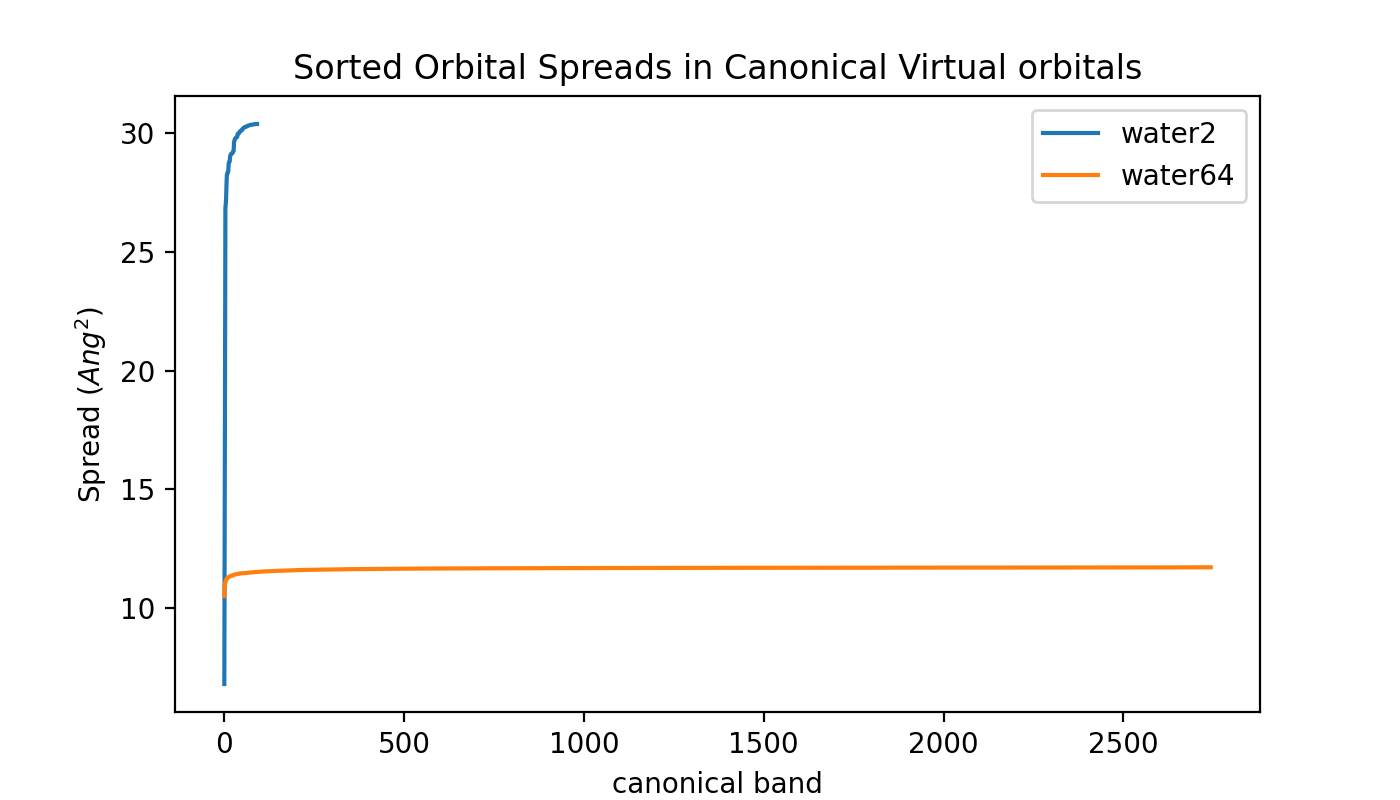

<IPython.core.display.Javascript object>


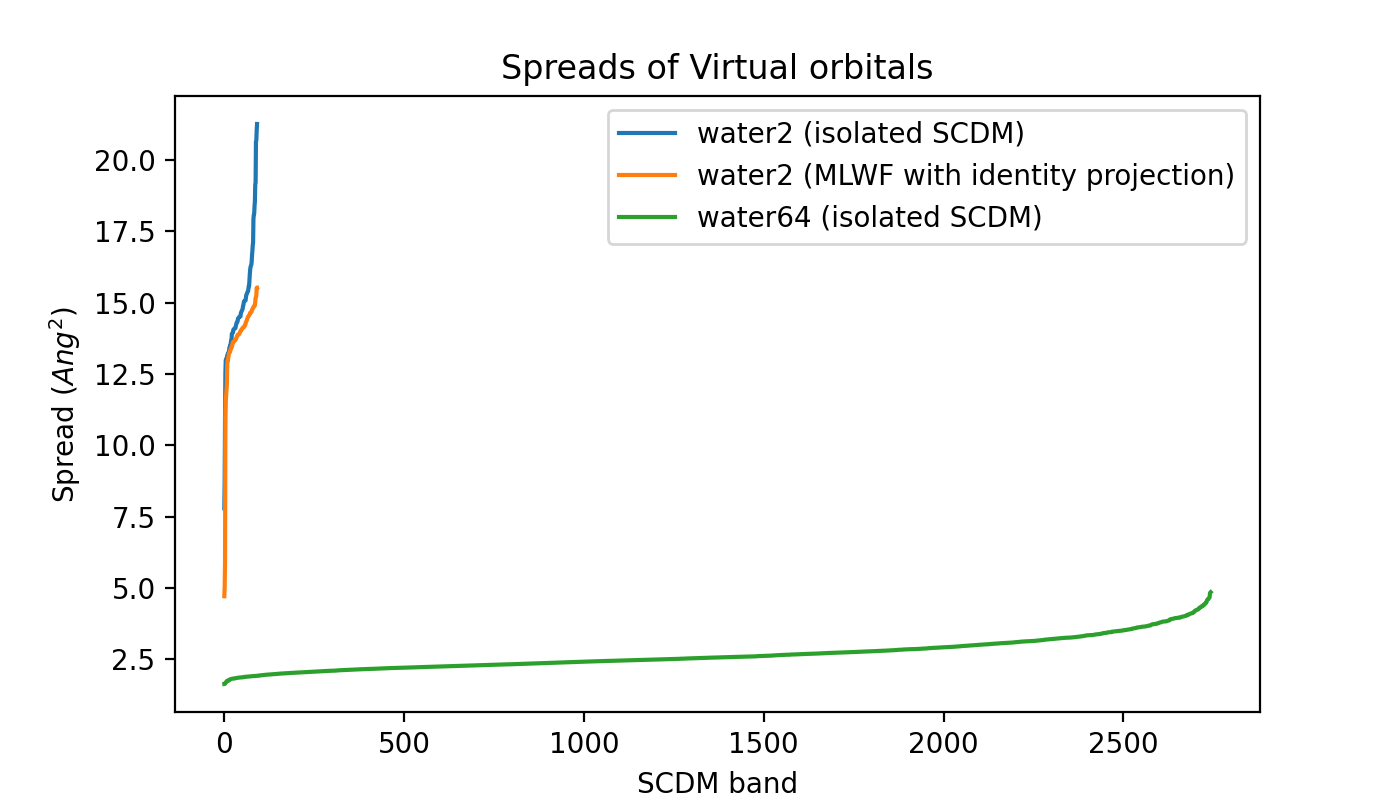

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [11]:
Omegas2_phiocc = np.load('unsorted_obtl_spread_scdm_phi_dim_8_occ_water2.npy')
Omegas2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_92_virt_water2.npy')
Omegas64_phiocc = np.load('unsorted_obtl_spread_scdm_phi_dim_256_occ_water64.npy')
Omegas64_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2744_virt_water64.npy')

Omegas2_cano2MLWF_phiocc = np.load('unsorted_spread_cano2MLWF_water2_8occ.npy')
Omegas2_cano2MLWF_phivirt = np.load('unsorted_spread_cano2MLWF_water2_92virt.npy')
Omegas64_cano2MLWF_phiocc = np.load('unsorted_spread_cano2MLWF_water64_256occ.npy')

plt.figure(6)
plt.plot(sorted(Omegas2_psi[0:8]),label='water2')
plt.plot(sorted(Omegas64_psi[0:256]),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Sorted Orbital Spreads in Canonical Occupied orbitals')
plt.xlabel('canonical band')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(7)
plt.plot(sorted(Omegas2_phiocc),label='water2 (isolated SCDM)')
plt.plot(sorted(Omegas2_cano2MLWF_phiocc),label='water2 (MLWF with identity projection)')
plt.plot(sorted(Omegas64_phiocc),label='water64 (isolated SCDM)')
plt.plot(sorted(Omegas64_cano2MLWF_phiocc),label='water64 (MLWF with identity projection)')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of Occupied orbitals')
plt.xlabel('SCDM band')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(8)
plt.plot(sorted(Omegas2_psi[8:]),label='water2')
plt.plot(sorted(Omegas64_psi[256:]),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Sorted Orbital Spreads in Canonical Virtual orbitals')
plt.xlabel('canonical band')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(9)
plt.plot(sorted(Omegas2_phivirt),label='water2 (isolated SCDM)')
plt.plot(sorted(Omegas2_cano2MLWF_phivirt),label='water2 (MLWF with identity projection)')
plt.plot(sorted(Omegas64_phivirt),label='water64 (isolated SCDM)')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of Virtual orbitals')
plt.xlabel('SCDM band')
plt.ylabel('Spread ($Ang^{2}$)')

### Computing Charges on NERSC's Cori Haswell

####  cost =  walltime in hours×number of nodes×QOS factor×charge factor

### Water64 with nband = 3000 

### QE calculations 
#### NSCF(debug) : cost = 0.239 x 16  x 1 x 140 = 535.36 NERSC-hours
#### PW2WANNIER(premium) : cost = 3.281 x 1 x 2 x 140 = 918.68 NERSC-hours
### Softwares : 
#### canonical + isolated SCDM orbitals with .npy format (bash) :  unknown hours 
#### orbital spread calculations (bigmem) : cost = (1.283(3000 canonical) + 1.167(2744 scdm virtual) + 0.100(256 scdm occupied) ) x 1 x 1? x 140? = 357 NERSC-hours 


### Notes:
#### 1. The Davidson diagonalization during the nscf calculation is currently limited to nband=3000 due to error in routine  cdiaghg (3053): problems computing cholesky. 
#### 2. pw2wannier is a computational bottleneck but can get around by modifying pw2wannier source code to run in parallel.
#### 3. UNK file for 3000 canonical orbitals in water64 has about 350 GB in memory. 

<IPython.core.display.Javascript object>


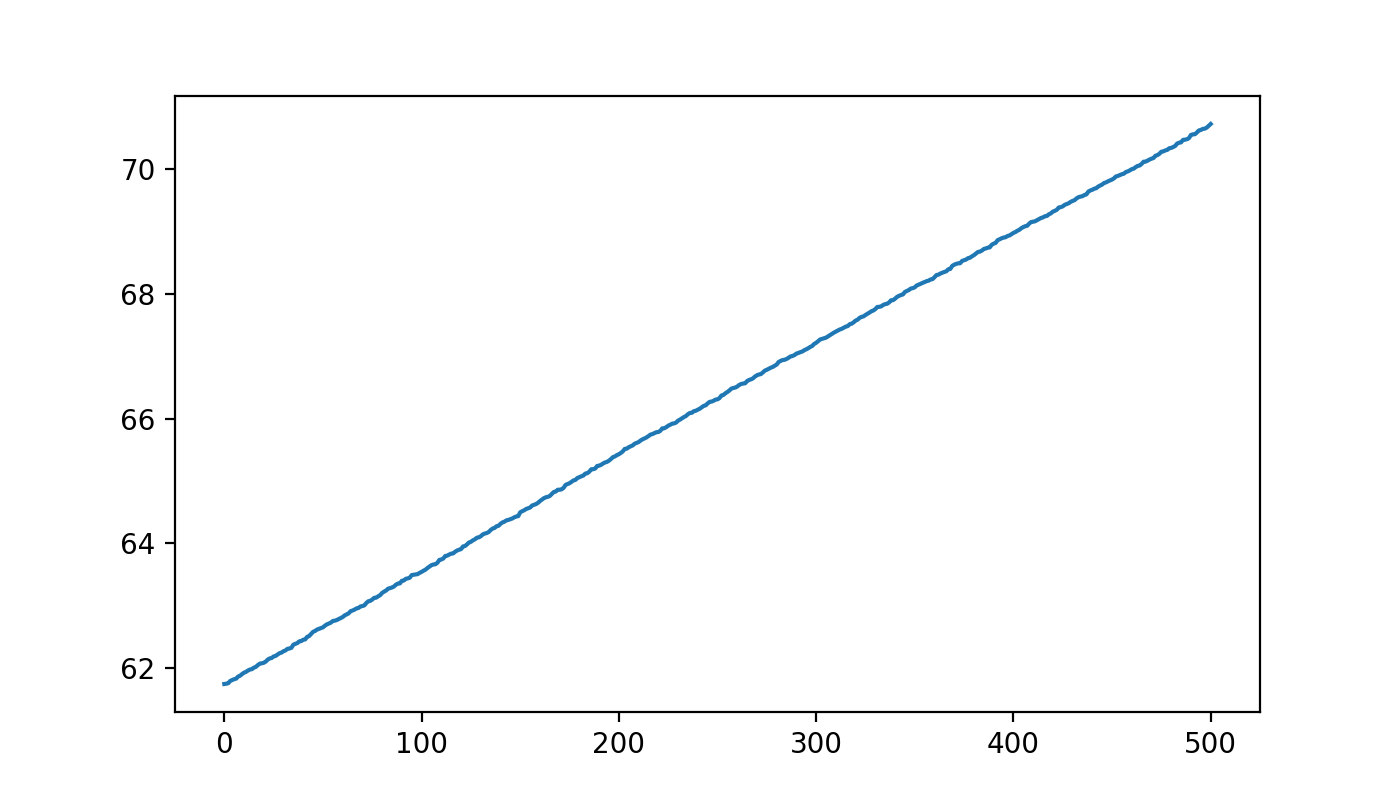

In [6]:
plt.figure(10)
plt.plot(D_water64[2499:])

In [7]:
print(D_water64[2499+256:])

[66.450555612113, 66.480589200122, 66.490798970401, 66.498458453228, 66.514330476005, 66.539820792225, 66.555460718292, 66.562211971492, 66.567097706195, 66.601687257097, 66.620366461941, 66.629783198178, 66.64633771135, 66.674775667468, 66.695572059017, 66.707785692002, 66.714524685003, 66.740310497553, 66.770011703986, 66.78329675008, 66.799303649467, 66.816564101512, 66.828949095527, 66.847191676495, 66.8673253708, 66.90904856142, 66.925595346069, 66.939759389534, 66.94353929696, 66.957003056403, 66.975476949315, 66.997463826736, 67.004554761829, 67.019006930701, 67.043414482131, 67.0530264446, 67.066461385765, 67.07660526494, 67.097159052096, 67.112035367818, 67.128914273914, 67.149952103778, 67.165075103945, 67.198289290646, 67.216452865163, 67.241643643542, 67.269359092359, 67.279000787426, 67.287143999956, 67.298863618252, 67.319098006859, 67.338431718959, 67.361396218902, 67.37943775904, 67.397364537193, 67.413424623115, 67.429702746, 67.441175845361, 67.458952451467, 67.475469

<IPython.core.display.Javascript object>


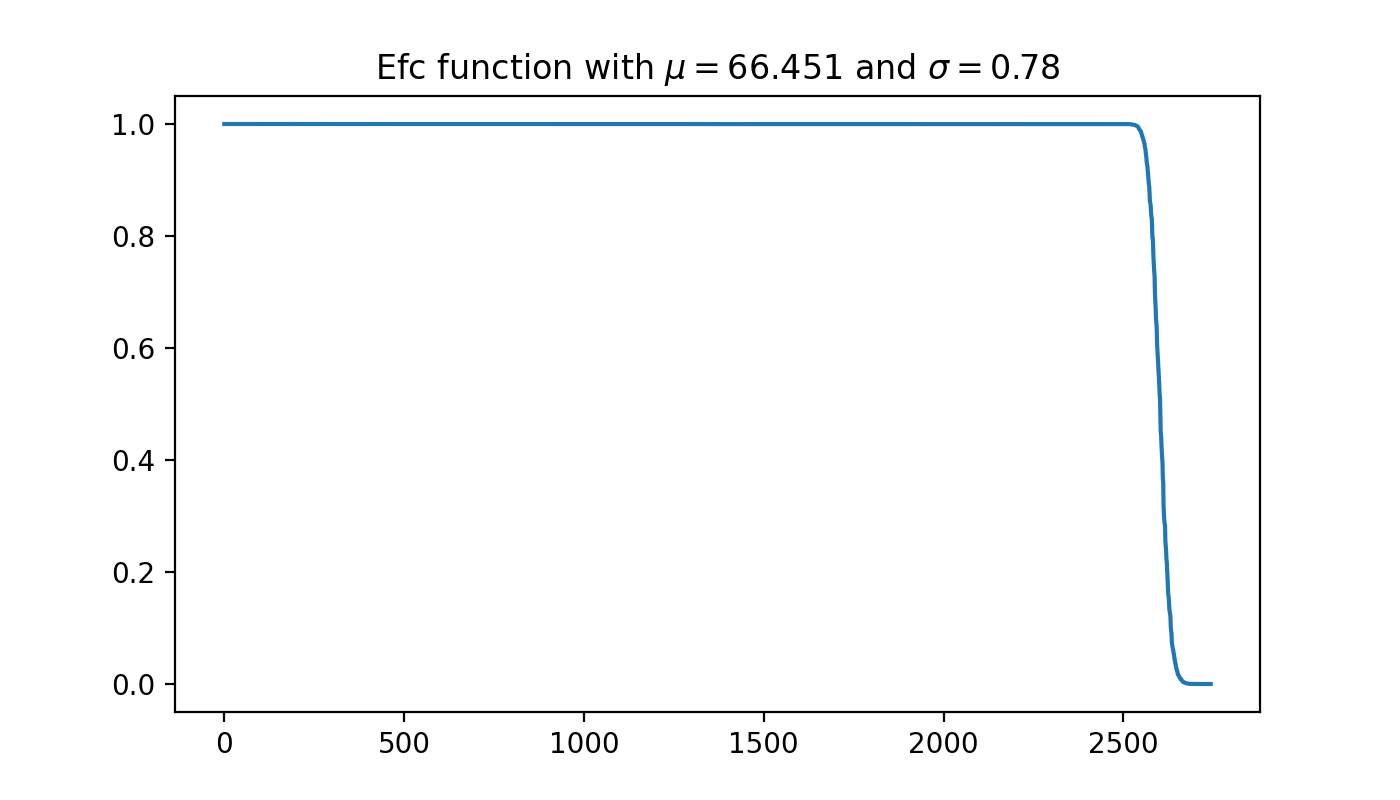

efc of maximal eigenvalue is  2.6647143334124766e-09


In [8]:
from scipy import special
# 
mu = 66.451+1.8
sigma = 0.6
f= 0.5*special.erfc((np.array(D_water64[256:])-mu)/sigma) 
plt.figure(11)
plt.title('Efc function with $\mu = 66.451$ and $\sigma = 0.78$')
plt.plot(f)
count_occ = len([i for i in f if i == 1.0]) 
count_lower = len([i for i in f if i > 0.5]) 
count_unocc = len([i for i in f if i < 10**-16]) 
count_upper = len([i for i in f if i < 0.5])
num_outvirt = 500
#print(count_lower-count_occ,count_upper-count_unocc)
print('efc of maximal eigenvalue is ', f[-1])
#list_f = f.tolist()
#center = list_f.index(0.5)
#print(D_water64[center+256+count_lower-count_occ])

In [9]:
3000-(2500+256)

244

In [10]:
len(D_water2)

100